# EDA de los datasets 


Se realiza el Análisis Exploratorio de los datos de los tres conjuntos de datos ya limpios para finalmente elegir las variables que serán usadas para entrenar el modelo de recomendación solicitado. Esto se hace dado que es un gran volumen de información y los recursos de procesamiento y almacenamiento, sobretodo al momento de deployar el proyecto, son limitados.

## Importaciones

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


## EDA del Endopint  `Developer`
En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto `df_merge` que ya pasó por el proceso de ETL.

### Lectura del conjunto de datos

Se leen los datos de .csv y se guarda en un dataframe.

In [3]:
df_output = pd.read_parquet('output.parquet')
df_output.head()

,publisher,genres,app_name,release_date,price,item_id,developer
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,4.99,761140.0,Kotoshiro
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,0.00,643980.0,Secret Level SRL
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,0.00,670290.0,Poolians.com
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,0.99,767400.0,彼岸领域
4,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018-01-04,3.99,772540.0,Trickjump Games Ltd


Análisis de cada variable de manera individual

In [3]:
df_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22529 entries, 0 to 22528
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     22529 non-null  object 
 1   genres        22529 non-null  object 
 2   app_name      22529 non-null  object 
 3   release_date  22529 non-null  object 
 4   price         22529 non-null  float64
 5   item_id       22529 non-null  float64
 6   developer     22529 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.2+ MB


Se revisan los tipos de datos y no se observan datos nulos, lo que corresponde a nuestro ETL Luego de haber realizado limpieza de los mismos

## Deteccion de Outliers

In [14]:
df_output.describe()

,price,item_id
count,22529.000000,2.252900e+04
mean,8.965943,4.307083e+05
std,15.414846,1.918428e+05
min,0.000000,1.000000e+01
25%,2.990000,3.022900e+05
50%,4.990000,4.269280e+05
75%,9.990000,5.807000e+05
max,995.000000,2.028850e+06


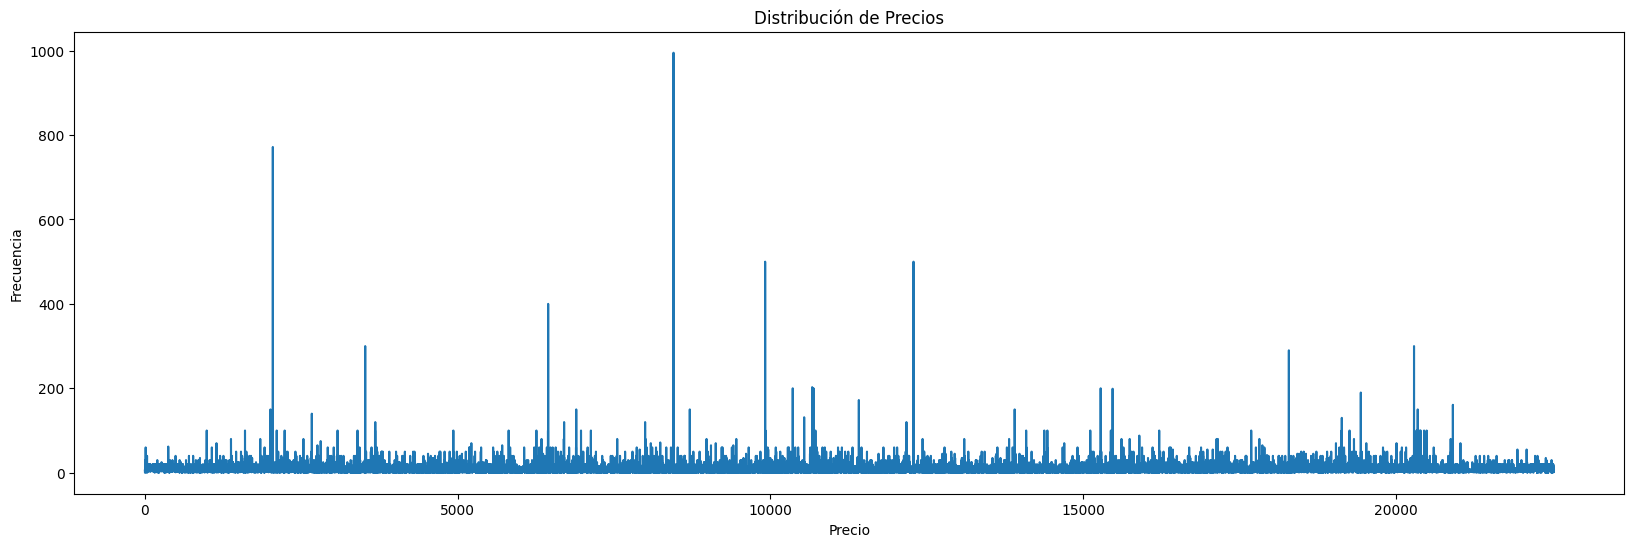

In [16]:

plt.figure(figsize=(20, 6))
sns.lineplot(df_output['price'])
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

Detectamos algunos outliers, esto se debe a valores elevados de algunos juegos, pero no afectan al analisis 

In [ ]:
plt.figure(figsize=(20, 6))
sns.lineplot(df_output['price'])
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

### Analizamos la cantidad de registros, juegos y desarrolladores hay

In [172]:
print(f'La cantidad de registros que hay son: {df_output.shape[0]}')


La cantidad de registros que hay son: 38032


In [60]:
# Cantidad de usuarios que dieron su opinion
print(f"Cantidad de desarrolladores: {len(df_output['publisher'].unique())}")

Cantidad de desarrolladores: 1376


In [180]:
print(f"Cantidad de titulos disponibles: {len(df_output['app_name'].unique())}")

Cantidad de titulos disponibles: 2531


### Analizamos cuantos juegos son gratis

In [195]:
publishers_price_zero = df_output.loc[df_output['price'] == 0, 'publisher'].unique()
count_publishers_price_zero = len(publishers_price_zero)
print(f"Cantidad de desarrolladores con juegos gratis: {count_publishers_price_zero}")

Cantidad de desarrolladores con juegos gratis: 269


In [186]:
free_games_count = len(df_output[df_output['price'] == 0]['app_name'].unique())
print(f"Cantidad de juegos gratis: {free_games_count}")

Cantidad de juegos gratis: 304


## EDA del Endopint  `UserData`
En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto `df_merge` que ya pasó por el proceso de ETL.

### Recomendaciones por `Sentiment_analysis` y `recommend`

In [70]:
# Se agrupa por 'sentiment_analysis' y 'reviews_recommend'
df_agrupado = df_merge.groupby(['Sentiment_analysis', 'recommend'])
# Se cuentan la cantidad de reviews en cada grupo
cantidad_grupo = df_agrupado.size()
# Se calcula el porcentaje por cada grupo
porcentaje_grupo = 100 * df_agrupado.size() / len(df_merge)
# Se crea un datafram con el resumen
sentimiento_recomendacion = pd.DataFrame({
    "Cantidad": cantidad_grupo,
    "Porcentaje": porcentaje_grupo
})
sentimiento_recomendacion

Cantidad  Porcentaje
Sentiment_analysis recommend                      
0.0                False          1393    3.662705
                   True           3793    9.973180
1.0                False          1817    4.777556
                   True          14232   37.421119
2.0                False           586    1.540808
                   True          16211   42.624632

Se puede ver que el sentimiento neutral recomienda el juego por lo que un podría estar relacionado con un comentario sencillo sin muchos detalles pero que aún así el juego le gustó como para recomendar. Por otra parte, de los comentarios que reflejaron un sentimiento negativo, aún recomienda el juego, lo que es algo contradictorio, a lo mejor simplemente no le gusto alguna parte del mismo, pero aun asi lo recomienda.

In [ ]:
# Calcular la frecuencia de cada valor en la columna Sentiment_analysis
sentiment_counts = df_reviews['Sentiment_analysis'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución del Análisis de Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Rotar etiquetas en el eje x si es necesario
plt.grid(axis='y')
plt.show()